#Implementing of ANN using keras


In [20]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [21]:
#checking the version
print(f'Tensorflow version {tf.__version__}')


Tensorflow version 2.15.0


In [22]:
os.getcwd()


'/content'

#Checking GPU/CPU

In [23]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [24]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [25]:
check_list=['GPU','CPU']

for device in check_list:
  out=tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f'{device} is available')
    print(f'Details >> {out}')
  else:
    print(f"{device} isn't available")

GPU is available
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]



#Creating the simpler classifier using keras on Mnist data

In [26]:
dataset=tf.keras.datasets.mnist

In [27]:
dataset

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [28]:
(X_train_full,y_train_full),(X_test,y_test)=dataset.load_data()

In [29]:
X_train_full.shape

(60000, 28, 28)

In [30]:
X_test.shape

(10000, 28, 28)

In [31]:
print(f'data type of X_train_full: {X_train_full.dtype},\n shape 0f X_train_full: {X_train_full.shape}')

data type of X_train_full: uint8,
 shape 0f X_train_full: (60000, 28, 28)


In [32]:
#create a validation data set from te full training data
#scale the data between 0 and 1 by divinding it by 255,as it is an unsigned data between 0-255 range
X_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]


#scale the test set as well
X_test=X_test/255

In [33]:
print(f'Training dataset is {len(X_train_full[5000:])}')
print(f'Test dataset is {len(X_test)}')
print(f'Validation dataset is {len(X_train_full[:5000])}')


Training dataset is 55000
Test dataset is 10000
Validation dataset is 5000


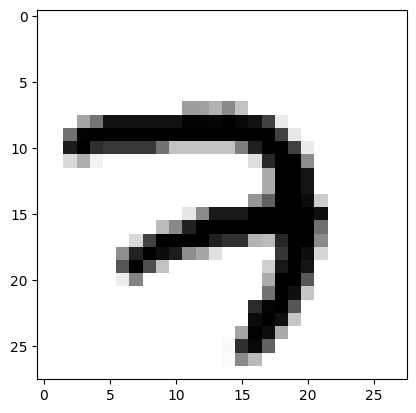

In [34]:
#Viewing some data
plt.imshow(X_train[0],cmap='binary')
plt.show()

<Axes: >

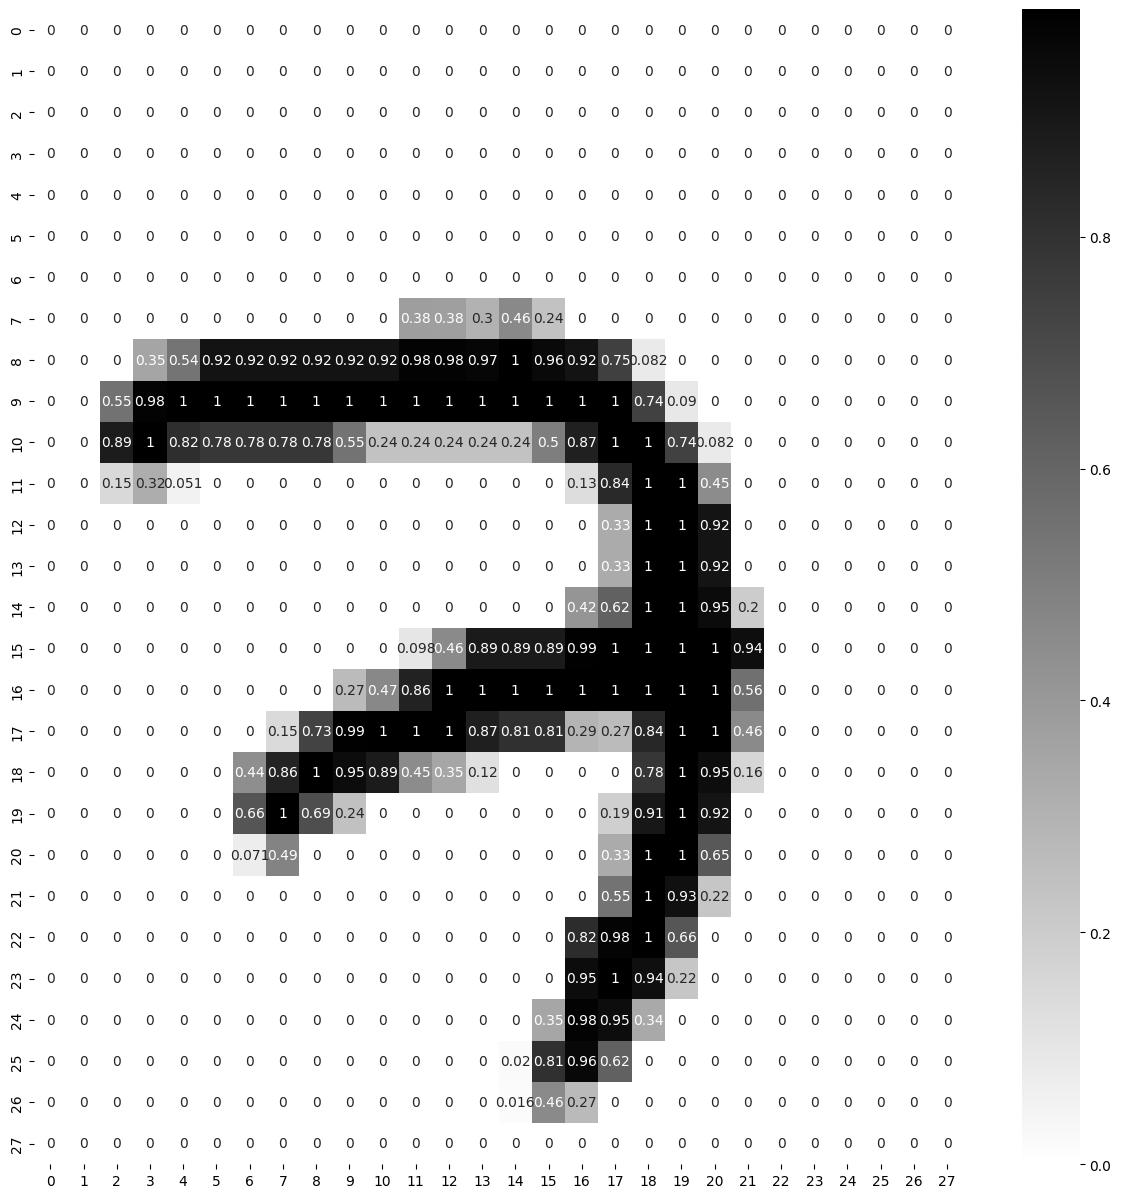

In [35]:
#Visualizing the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap='binary')

In [36]:
#Creating the layers of Ann
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenLayer1'),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenLayer2'),
        tf.keras.layers.Dense(10,activation='softmax',name='outputLayer1')]

model_clf=tf.keras.models.Sequential(Layers)


In [37]:
model_clf.layers

In [38]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer1 (Dense)        (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
#firstLayer+secondLayer+bias
784*300+300,300*100+100,100*10+10

(235500, 30100, 1010)

In [40]:
#Total parameters to be trained
print(f'Total_traininable_parameters are {sum((235500, 30100, 1010))}')

Total_traininable_parameters are 266610


In [41]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [42]:
hidden1.get_weights() #it gives 2 different arrays outputs, one the weights and other is biases

[array([[-0.0575629 ,  0.04097205, -0.01086025, ...,  0.07345258,
          0.01757231,  0.06813273],
        [ 0.06791751, -0.06930238, -0.06763903, ...,  0.03205454,
          0.01566645,  0.0215891 ],
        [ 0.04127707,  0.03156902, -0.00555908, ...,  0.02463263,
         -0.03856594,  0.02027728],
        ...,
        [-0.03751205, -0.0452979 ,  0.01845116, ..., -0.04501557,
         -0.01929313, -0.04233955],
        [ 0.02289029,  0.05214585,  0.05391413, ...,  0.03576627,
         -0.036909  ,  0.06610256],
        [ 0.03180601,  0.05658498, -0.03183389, ...,  0.06553349,
          0.04819345,  0.02155311]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [43]:
hidden1.get_weights()[0].shape  #total weights present in hidden layer1

(784, 300)

In [44]:
hidden1.get_weights()[1].shape #total biases present in hidden layer1

(300,)

In [45]:
weights,biases=hidden1.get_weights()

In [46]:
print('Shape\n',weights.shape,'\n')
weights

Shape
 (784, 300) 



array([[-0.0575629 ,  0.04097205, -0.01086025, ...,  0.07345258,
         0.01757231,  0.06813273],
       [ 0.06791751, -0.06930238, -0.06763903, ...,  0.03205454,
         0.01566645,  0.0215891 ],
       [ 0.04127707,  0.03156902, -0.00555908, ...,  0.02463263,
        -0.03856594,  0.02027728],
       ...,
       [-0.03751205, -0.0452979 ,  0.01845116, ..., -0.04501557,
        -0.01929313, -0.04233955],
       [ 0.02289029,  0.05214585,  0.05391413, ...,  0.03576627,
        -0.036909  ,  0.06610256],
       [ 0.03180601,  0.05658498, -0.03183389, ...,  0.06553349,
         0.04819345,  0.02155311]], dtype=float32)

In [47]:
print('Shape\n',biases.shape,'\n')
biases

Shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [48]:
model_clf.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [49]:
#training the model
history=model_clf.fit(X_train,y_train,batch_size=32,epochs=30,validation_data=(X_valid,y_valid),verbose=1)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6067 - accuracy: 0.8462 - val_loss: 0.3030 - val_accuracy: 0.9156
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2862 - accuracy: 0.9185 - val_loss: 0.2390 - val_accuracy: 0.9362
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2334 - accuracy: 0.9335 - val_loss: 0.1980 - val_accuracy: 0.9464
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1985 - accuracy: 0.9434 - val_loss: 0.1769 - val_accuracy: 0.9504
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1731 - accuracy: 0.9506 - val_loss: 0.1575 - val_accuracy: 0.9560
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1533 - accuracy: 0.9562 - val_loss: 0.1420 - val_accuracy: 0.9610
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1373 - accuracy: 0.9611 - val_loss: 0.1318 - val_accuracy:

In [50]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [51]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.606692,0.846218,0.303040,0.9156
1,0.286176,0.918455,0.238989,0.9362
2,0.233354,0.933491,0.197961,0.9464
3,0.198488,0.943400,0.176949,0.9504
4,0.173086,0.950636,0.157499,0.9560
5,0.153344,0.956236,0.141995,0.9610
6,0.137293,0.961073,0.131835,0.9648
7,0.123808,0.964545,0.124891,0.9676
8,0.112876,0.968345,0.114637,0.9686
9,0.103595,0.970855,0.110352,0.9712


<Axes: >

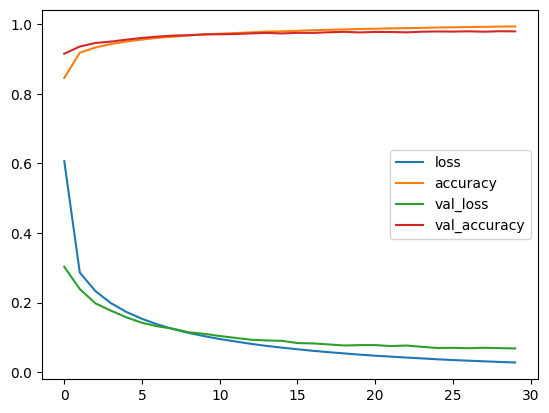

In [52]:
pd.DataFrame(history.history).plot()

In [53]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9796


[0.06788470596075058, 0.9796000123023987]

#Sample check of the Test_data

In [54]:
X_new=X_test[:3]

In [55]:
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

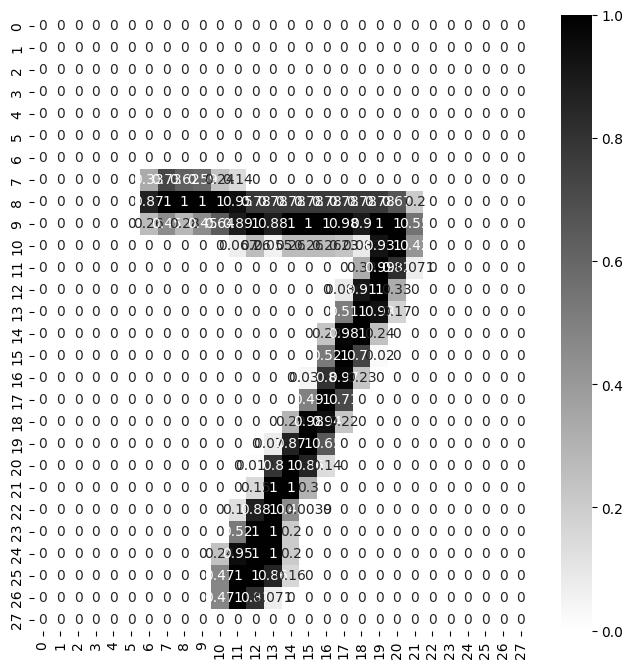

In [56]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[0],annot=True,cmap='binary')

In [57]:
y_prob=model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 75ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.001,
        0.   ]], dtype=float32)

In [58]:
y_pred=np.argmax(y_prob,axis=-1)

In [59]:
y_pred

array([7, 2, 1])

In [60]:
actual

array([7, 2, 1], dtype=uint8)

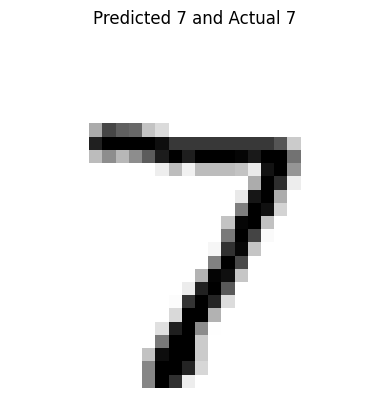

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


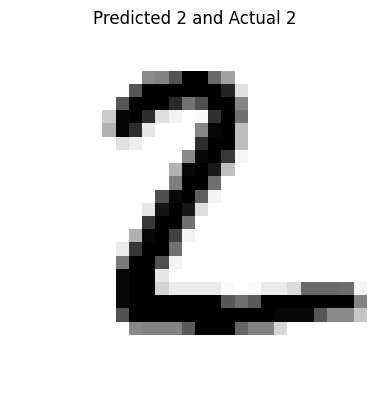

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


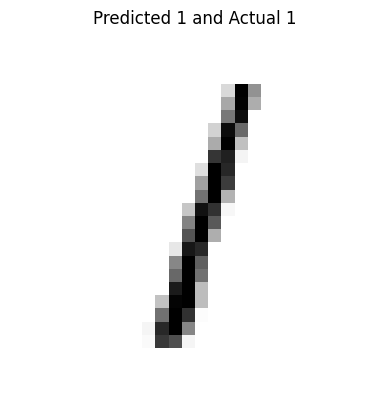

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [61]:
#plot
for data,pred,actual_data in zip(X_new,y_pred,actual):
  plt.imshow(data,cmap='binary')
  plt.title(f'Predicted {pred} and Actual {actual_data}')
  plt.axis('off')
  plt.show()
  print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')